In [1]:
%pylab inline
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
import scipy.misc
from collections import Counter
from sklearn.decomposition import PCA


def KMeans(K,X):
    d,N = X.shape
    change = True
    R = X[:,np.random.randint(0,N,K)]
    M = np.zeros((N, K))
    while change:
        dists = -2 * ( X.T @ R) + np.sum(R ** 2, axis=0, keepdims=True)
        m = np.argmin(dists, axis =1)
        M2 = np.take(np.eye(K), m, axis=0).astype(int)
        change = not np.array_equal(M,M2)
        M = M2
        R = np.dot(X,M)/np.maximum(np.sum(M.T,axis=1),1)
    return R, m
    

Populating the interactive namespace from numpy and matplotlib


In [2]:
filename = "kosarak.dat"
T = 1000
counted = Counter([int(x) for x in open(filename).read().split()])
prodSort = counted.most_common(T)

In [3]:
maxProductNum = max(counted.keys())
productArray = np.zeros((maxProductNum+1,T))
productDict = {x[0]:i for i, x in enumerate(prodSort)}

In [4]:
with open(filename) as f:
    i =0
    for line in f:
        i+=1
        transaction = [int(x) for x in line.split()]
        intersection = set(productDict).intersection(transaction)
        inds = [productDict[x] for x in intersection ]
        a, b = np.meshgrid(transaction, inds)
        if len(a) * len(b) > 0:
            productArray[a,b] += 1


In [5]:
productArray = productArray.astype(int)
res = PCA(n_components=2).fit_transform(productArray)

In [6]:
R, m = KMeans(X=productArray.T, K=5)
R = R.T

(0, 3000)

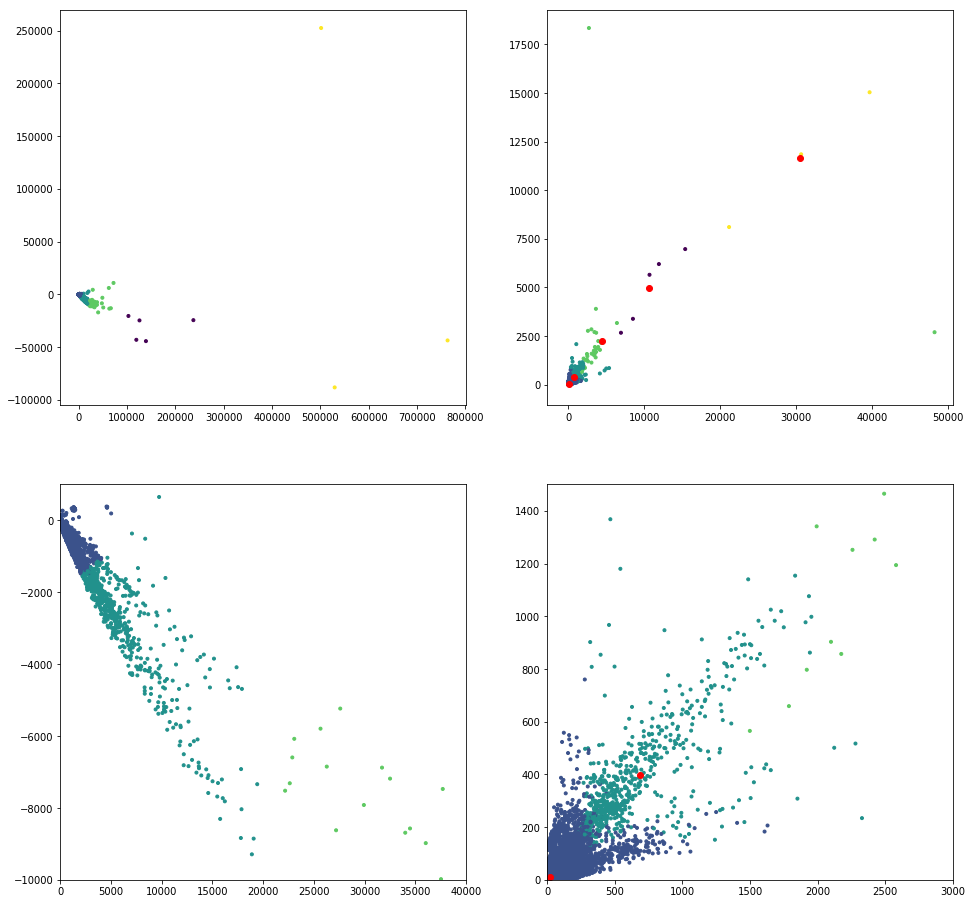

In [7]:
fig = plt.figure(figsize=(16,16))
plt.subplot(221)
plt.scatter(res[:,0], res[:,1], c=m, marker='.')

plt.subplot(222)

plt.scatter(productArray[:,10], productArray[:,30], c=m, marker='.')
plt.scatter(R[:,10], R[:,30], c='red')

plt.subplot(223)
plt.scatter(res[:,0], res[:,1], c=m, marker='.')
plt.ylim(-10000,1000)
plt.xlim(0,40000)

plt.subplot(224)
plt.scatter(productArray[:,10], productArray[:,30], c=m, marker='.')
plt.scatter(R[:,10], R[:,30], c='red')
plt.ylim(0,1500)
plt.xlim(0,3000)

In [8]:
R2, m2 = KMeans(X=res.T, K=10)
R2 = R2.T

(0, 3000)

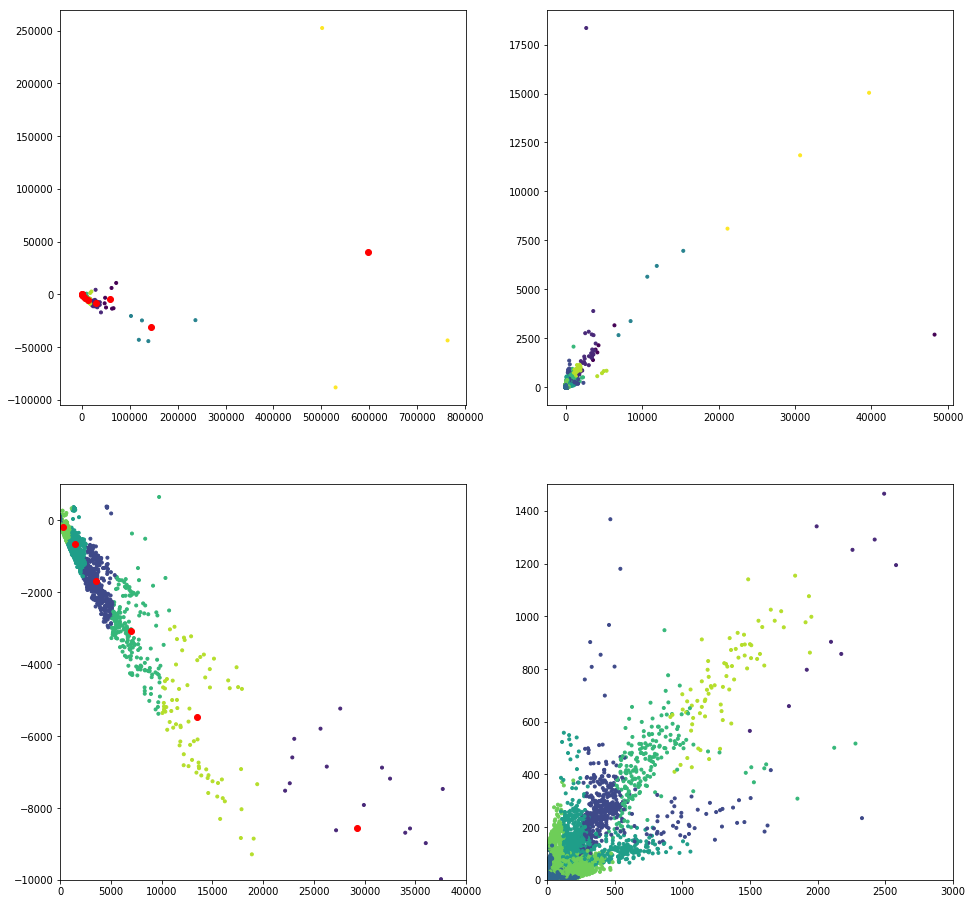

In [9]:
fig = plt.figure(figsize=(16,16))
plt.subplot(221)
plt.scatter(res[:,0], res[:,1], c=m2, marker='.')
plt.scatter(R2[:,0], R2[:,1], c='red')

plt.subplot(222)
plt.scatter(productArray[:,10], productArray[:,30], c=m2, marker='.')

plt.subplot(223)
plt.scatter(res[:,0], res[:,1], c=m2, marker='.')
plt.scatter(R2[:,0], R2[:,1], c='red')
plt.ylim(-10000,1000)
plt.xlim(0,40000)

plt.subplot(224)
plt.scatter(productArray[:,10], productArray[:,30], c=m2, marker='.')
plt.ylim(0,1500)
plt.xlim(0,3000)